In [1]:
#Download required libraries
!pip install "rembg[cpu]"

INFO: pip is looking at multiple versions of numba to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.4 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 11.3.0
    Uninstalling pillow-11.3.0:
      Successfully uninstalled pillow-11.3.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
   

In [1]:
#Import required libraries
from google.colab import drive, files
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io
import os
from rembg import remove

In [4]:
#Set the classes names
class_names = [
    'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
    'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy',
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_',
    'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot',
    'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
    'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy',
    'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight',
    'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy',
    'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy',
    'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'
]
print(f"\nSuccessfully loaded {len(class_names)} classes!")


Successfully loaded 38 classes!


In [12]:
# Upload the model
print("Upload the model (ending in .keras) file: ")
uploaded_model = files.upload()
model_filename = list(uploaded_model.keys())[0]
if not model_filename.endswith(".keras"):
  raise ValueError("Please upload the correct model! (Ending with .keras)")
else:
  with open(model_filename, 'wb') as f:
        f.write(uploaded_model[model_filename])
        model = tf.keras.models.load_model(model_filename)
        model.summary()

Upload the model (ending in .keras) file: 


Saving universal_model.keras to universal_model (1).keras


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing (Resizing)             │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip (RandomFlip)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 256, 256, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,734,260 (18.06 MB)

 Trainable params: 1,578,086 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,156,174 (12.04 MB)

Upload image to predict.


Saving dataset-cover.jpg to dataset-cover.jpg

Segmenting the background out of 'dataset-cover.jpg'...


  0%|                                               | 0.00/176M [00:00<?, ?B/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step

Top 3 Diagnoses:
 - Tomato___Bacterial_spot: 52.220001220703125%
 - Corn_(maize)___Common_rust_: 20.209999084472656%
 - Tomato___Septoria_leaf_spot: 18.389999389648438%


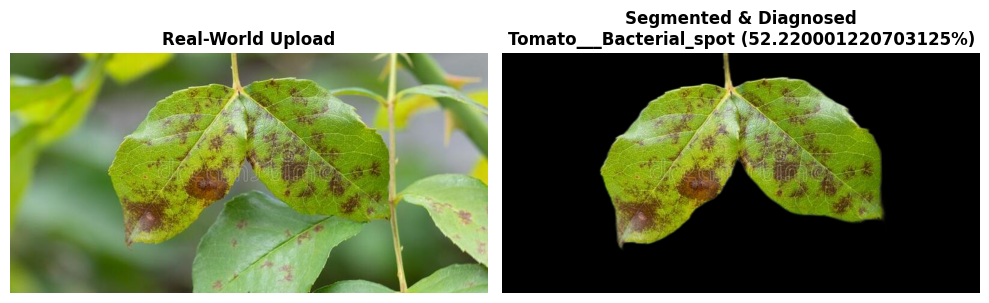

In [13]:
#Upload the image
print("Upload image to predict.")
uploaded = files.upload()
for filename in uploaded.keys():
    print(f"\nSegmenting the background out of '{filename}'...")
    with open(filename, 'rb') as i:
        input_data = i.read()
    output_data = remove(input_data)

    #Convert back to an image the model can read.
    #rembg adds a transparent (Alpha) channel, but our model expects exactly 3 channels (RGB).
    segmented_img = Image.open(io.BytesIO(output_data)).convert("RGB")

    #Resize to 256x256 for the neural network.
    img_resized = segmented_img.resize((256, 256))
    img_array = tf.keras.utils.img_to_array(img_resized)
    img_array = tf.expand_dims(img_array, 0)

    #Make the Prediction.
    predictions = model.predict(img_array)[0]

    #Calculate Top 3 Diagnoses.
    top_3_indices = np.argsort(predictions)[-3:][::-1]
    print(f"\nTop 3 Diagnoses:")
    for i in top_3_indices:
        disease = class_names[i]
        conf = round(100 * predictions[i], 2)
        print(f" - {disease}: {conf}%")

    #Display the Before & After.
    original_img = Image.open(filename)
    plt.figure(figsize=(10, 5))

    #Show Original.
    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.title("Real-World Upload", fontweight='bold')
    plt.axis("off")

    #Show Segmented & Prediction.
    plt.subplot(1, 2, 2)
    plt.imshow(segmented_img)
    best_guess = class_names[top_3_indices[0]]
    best_conf = round(100 * predictions[top_3_indices[0]], 2)
    plt.title(f"Segmented & Diagnosed\n{best_guess} ({best_conf}%)", fontweight='bold')
    plt.axis("off")
    plt.tight_layout()
    plt.show()